# Data Understanding

Our data was sourced from

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dense
from keras import models, layers

import numpy as np 
import pandas as pd
from PIL import Image
import glob
import os, os.path, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import pydot
import random
from dask import bag,  diagnostics 

In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import random
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend as K

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.applications import ResNet50, DenseNet121

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Basic EDA
open first image and check size

In [5]:
# im = Image.open('Dataset_Strawberry_Leaf_Disease/Calciumdeficiency/1015.jpg')
# arr = np.array(im)
# arr.shape

In [6]:
# Directory with leaf_spot pictures
leafspot_dir = os.path.join('./Dataset_Strawberry_Leaf_Disease/leaf_spot')

# Directory with healthy pictures
healthy_dir = os.path.join('./Dataset_Strawberry_Leaf_Disease/Healthy')

# Directory with Calciumdeficiency pictures
Calciumdeficiency_dir = os.path.join('./Dataset_Strawberry_Leaf_Disease/Calciumdeficiency')

# Directory with Calciumdeficiency pictures
Leafscorch_dir = os.path.join('./Dataset_Strawberry_Leaf_Disease/Leaf_scorch')


In [7]:
train_leafspot_names = os.listdir(leafspot_dir)
no_leafspot = len(os.listdir(leafspot_dir))
print('Total leaf_spot Images:', len(os.listdir(leafspot_dir)))
print(train_leafspot_names[:5])
print('')

train_healthy_names = os.listdir(healthy_dir)
no_healthy = len(os.listdir(healthy_dir))
print('Total healthy Images:', len(os.listdir(healthy_dir)))
print(train_healthy_names[:5])
print('')

train_Calciumdeficiency_names = os.listdir(Calciumdeficiency_dir)
no_Calciumdeficiency = len(os.listdir(Calciumdeficiency_dir))
print('Total Calciumdeficiency Images:', len(os.listdir(Calciumdeficiency_dir)))
print(train_Calciumdeficiency_names[:5])
print('')

train_Leafscorch_names = os.listdir(Leafscorch_dir)
no_Leafscorch = len(os.listdir(Leafscorch_dir))
print('Total Leafscorch Images:', len(os.listdir(Leafscorch_dir)))
print(train_Leafscorch_names[:5])

Total leaf_spot Images: 615
['leaf_spot1.jpg', 'leaf_spot10.jpg', 'leaf_spot100.jpg', 'leaf_spot101.jpg', 'leaf_spot102.jpg']

Total healthy Images: 3445
['1003.jpg', '1004.jpg', '1007.jpg', '1014.jpg', '1016.jpg']

Total Calciumdeficiency Images: 805
['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg']

Total Leafscorch Images: 3327
['StrawberryLeafScorch(1).JPG', 'StrawberryLeafScorch(10).JPG', 'StrawberryLeafScorch(100).JPG', 'StrawberryLeafScorch(1000).JPG', 'StrawberryLeafScorch(1001).JPG']


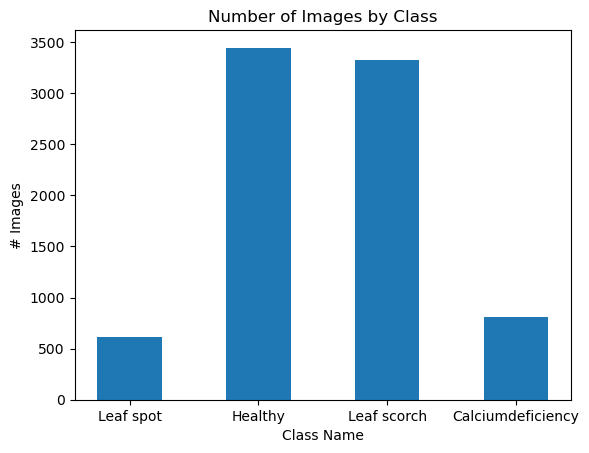

In [8]:
#plot number of classes to identify possible imbalances
number_classes = {
    'Leaf spot': 615,
    'Healthy': 3445,
    'Leaf scorch': 3327,
    'Calciumdeficiency': 805,
}

plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

# View sample images of each class

In [9]:
# Show images displayed 5x5
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

pic_index += 400

next_leafspot_pix = [os.path.join(leafspot_dir, fname) 
                for fname in train_leafspot_names[pic_index-5:pic_index]]

next_healthy_pix = [os.path.join(healthy_dir, fname) 
                for fname in train_healthy_names[pic_index-5:pic_index]]

next_Calciumdeficiency_pix = [os.path.join(Calciumdeficiency_dir, fname) 
                for fname in train_Calciumdeficiency_names[pic_index-5:pic_index]]

next_Leafscorch_pix = [os.path.join(Leafscorch_dir, fname) 
                for fname in train_Leafscorch_names[pic_index-5:pic_index]]

def show_image_sample(pic_directory):
    
    '''Returns 4x2 image samples from given directory'''
    
    fig = plt.gcf()
    fig.set_size_inches(ncols * 5, nrows * 5)
    for i, img_path in enumerate(pic_directory):
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = mpimg.imread(img_path)
        plt.imshow(img)
    plt.show()

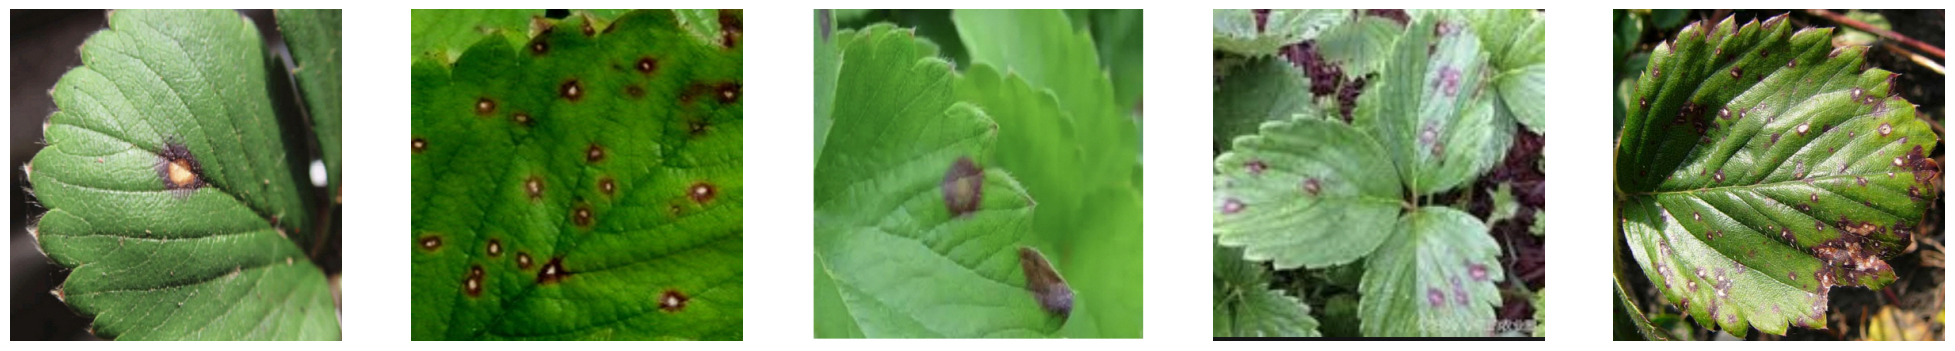

In [10]:
# Showing sample of Leaf spot images
show_image_sample(next_leafspot_pix)

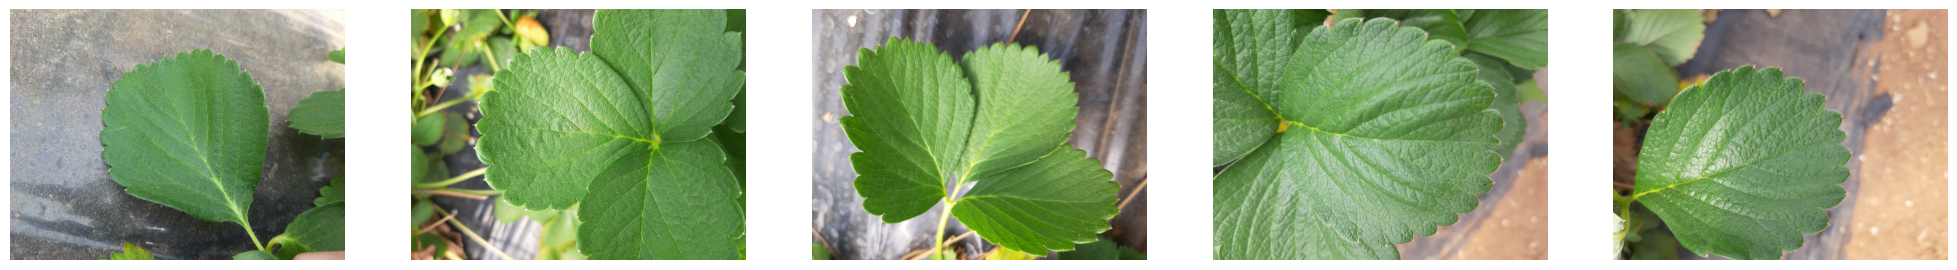

In [11]:
# Showing sample of Healthy images
show_image_sample(next_healthy_pix)

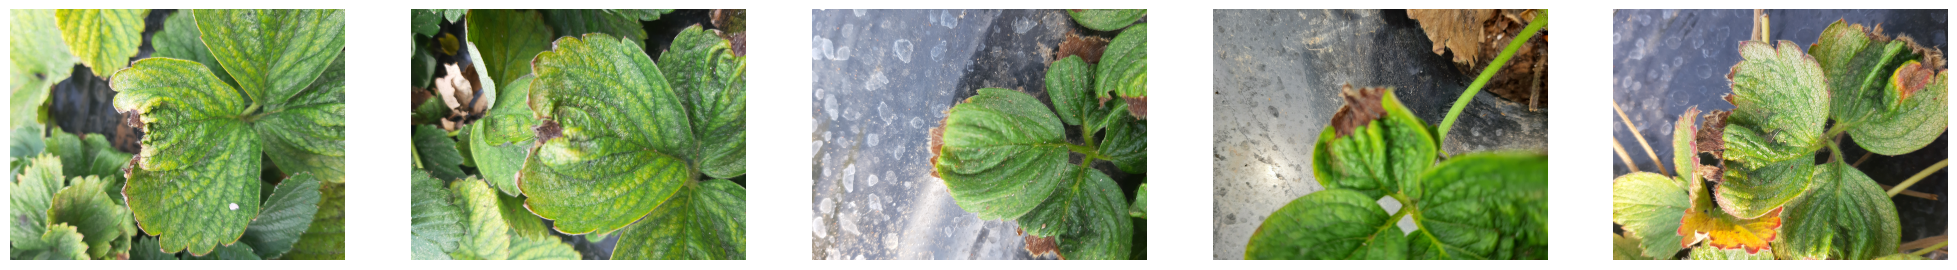

In [12]:
# Showing sample of Calciumdeficiency images
show_image_sample(next_Calciumdeficiency_pix)

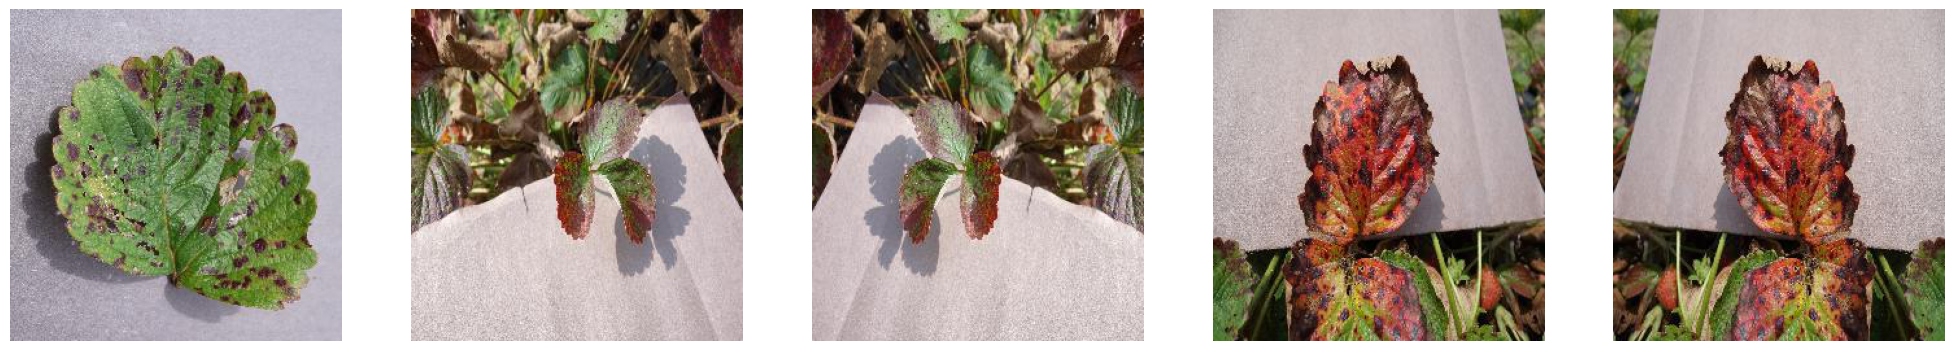

In [13]:
# Showing sample of Leaf scorch images
show_image_sample(next_Leafscorch_pix)

# Visualize Image Size before Preprocessing/ Resizing

[########################################] | 100% Completed |  8.5s
[########################################] | 100% Completed |  2min 22.1s
[########################################] | 100% Completed |  2min  6.3s
[########################################] | 100% Completed | 13.2s


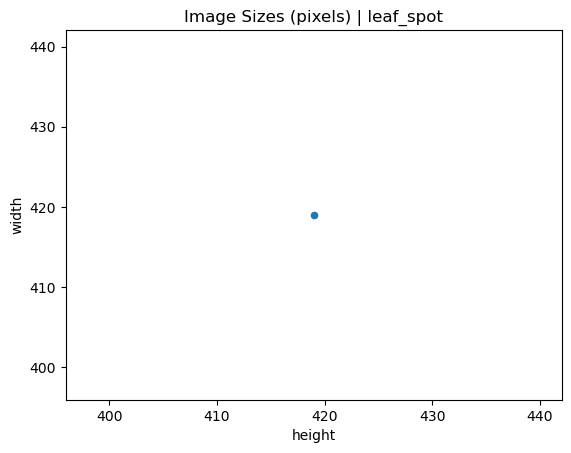

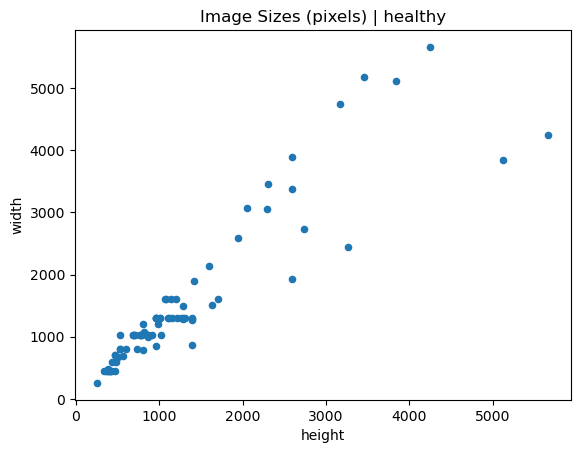

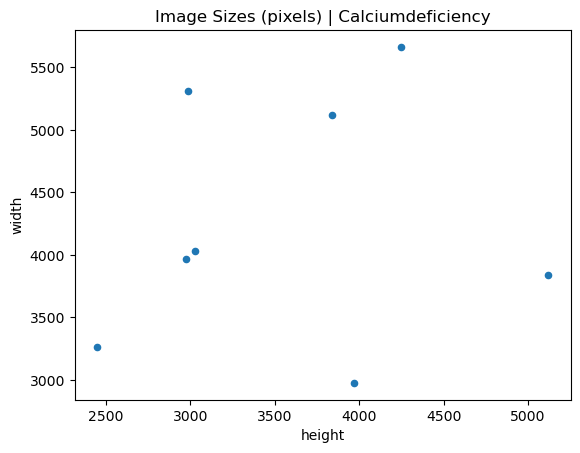

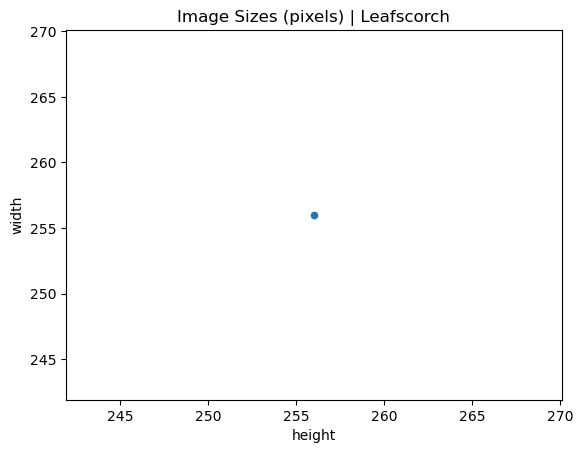

In [14]:
directories = {
               'leaf_spot': 'Dataset_Strawberry_Leaf_Disease/leaf_spot/', 
               'healthy': 'Dataset_Strawberry_Leaf_Disease/healthy/', 
               'Calciumdeficiency': 'Dataset_Strawberry_Leaf_Disease/Calciumdeficiency/',
               'Leafscorch': 'Dataset_Strawberry_Leaf_Disease/Leaf_scorch/'
              }

def get_dims(file):
    
    '''Returns dimensions of an RBG image'''
    
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

for n,d in directories.items(): 
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dimsbag = bag.from_sequence(filelist).map(get_dims)
    with diagnostics.ProgressBar():
        dims = dimsbag.compute()
        
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='height', y='width');
    plt.title('Image Sizes (pixels) | {}'.format(n))

# Splitting Images to Train/ Test Directories

In [15]:
#grab image names for each type
imgs_leafspot = [file for file in os.listdir(leafspot_dir)]
imgs_healthy = [file for file in os.listdir(healthy_dir)]
imgs_Calciumdeficiency = [file for file in os.listdir(Calciumdeficiency_dir)]
imgs_Leafscorch = [file for file in os.listdir(Leafscorch_dir)]

In [16]:
new_dir = 'split/'

In [17]:
#Check to ensure all images are included
print('# imgs_leafspot: ', len(imgs_leafspot))
print('# imgs_healthy: ', len(imgs_healthy))
print('# imgs_Calciumdeficiency: ', len(imgs_Calciumdeficiency))
print('# imgs_Leafscorch: ', len(imgs_Leafscorch))

# imgs_leafspot:  615
# imgs_healthy:  3445
# imgs_Calciumdeficiency:  805
# imgs_Leafscorch:  3327


In [18]:
#os.mkdir(new_dir)

#create variables for new split directories for train/ test
train_folder = os.path.join(new_dir, 'train')
train_leafspot = os.path.join(train_folder, 'leaf_spot')
train_healthy = os.path.join(train_folder, 'healthy')
train_Calciumdeficiency = os.path.join(train_folder, 'Calciumdeficiency')
train_Leafscorch = os.path.join(train_folder, 'Leafscorch')

test_folder = os.path.join(new_dir, 'test')
test_leafspot = os.path.join(test_folder, 'leaf_spot')
test_healthy = os.path.join(test_folder, 'healthy')
test_Calciumdeficiency = os.path.join(test_folder, 'Calciumdeficiency')
test_Leafscorch = os.path.join(test_folder, 'Leafscorch')

In [19]:
#create directories for splits
os.mkdir(train_folder)
os.mkdir(train_leafspot)
os.mkdir(train_healthy)
os.mkdir(train_Calciumdeficiency)
os.mkdir(train_Leafscorch)

os.mkdir(test_folder)
os.mkdir(test_leafspot)
os.mkdir(test_healthy)
os.mkdir(test_Calciumdeficiency)
os.mkdir(test_Leafscorch)

In [20]:
#use a 74/13/13 split for train/ test 
print('Number of images to test:')
print('# imgs_leafspot: ', round(len(imgs_leafspot)*.13))
print('# imgs_healthy: ', round(len(imgs_healthy)*.13))
print('# imgs_Calciumdeficiency: ', round(len(imgs_Calciumdeficiency)*.13))
print('# imgs_Leafscorch: ', round(len(imgs_Leafscorch)*.13))

Number of images to test:
# imgs_leafspot:  80
# imgs_healthy:  448
# imgs_Calciumdeficiency:  105
# imgs_Leafscorch:  433


In [21]:
imgs = imgs_leafspot[80:]
for img in imgs:
    origin = os.path.join(leafspot_dir, img)
    destination = os.path.join(train_leafspot, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_healthy[448:]
for img in imgs:
    origin = os.path.join(healthy_dir, img)
    destination = os.path.join(train_healthy, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Calciumdeficiency[105:]
for img in imgs:
    origin = os.path.join(Calciumdeficiency_dir, img)
    destination = os.path.join(train_Calciumdeficiency, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Leafscorch[433:]
for img in imgs:
    origin = os.path.join(Leafscorch_dir, img)
    destination = os.path.join(train_Leafscorch, img)
    shutil.copyfile(origin, destination)

In [22]:
imgs = imgs_leafspot[:80]
for img in imgs:
    origin = os.path.join(leafspot_dir, img)
    destination = os.path.join(test_leafspot, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_healthy[:448]
for img in imgs:
    origin = os.path.join(healthy_dir, img)
    destination = os.path.join(test_healthy, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Calciumdeficiency[:105]
for img in imgs:
    origin = os.path.join(Calciumdeficiency_dir, img)
    destination = os.path.join(test_Calciumdeficiency, img)
    shutil.copyfile(origin, destination)
    
imgs = imgs_Leafscorch[:433]
for img in imgs:
    origin = os.path.join(Leafscorch_dir, img)
    destination = os.path.join(test_Leafscorch, img)
    shutil.copyfile(origin, destination)

# Applying Data Augmentation

In [28]:
classes = ['leafspot','healthy','Calciumdeficiency']
num_epochs = 30
batch_size = 16

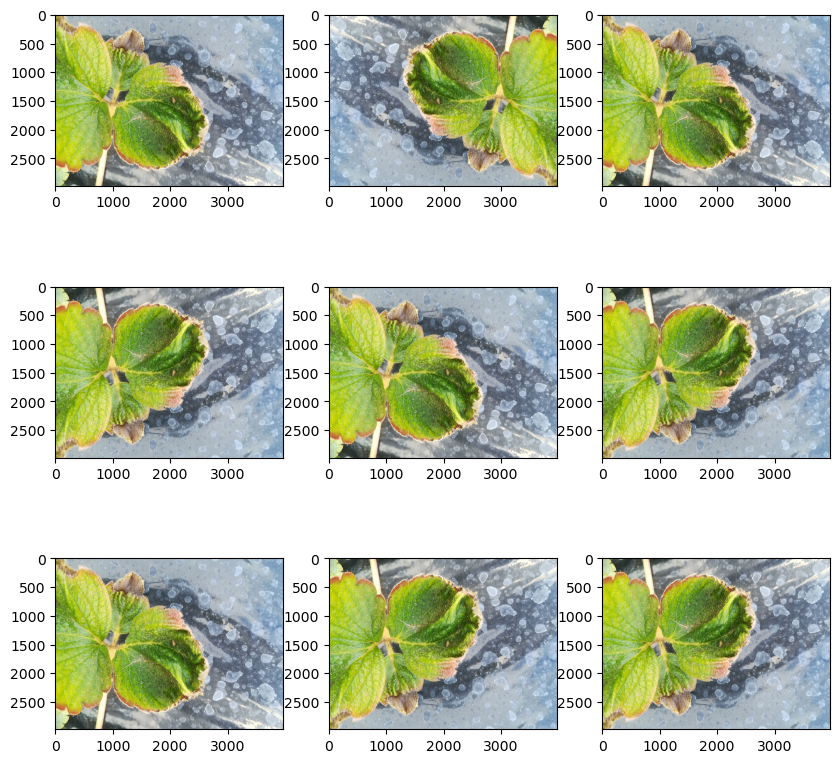

In [24]:
# Calciumdeficiency leaf image
img = load_img('split/train/Calciumdeficiency/1121.jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
# Demonstrating horizontal and vertical flips
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
fig=plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

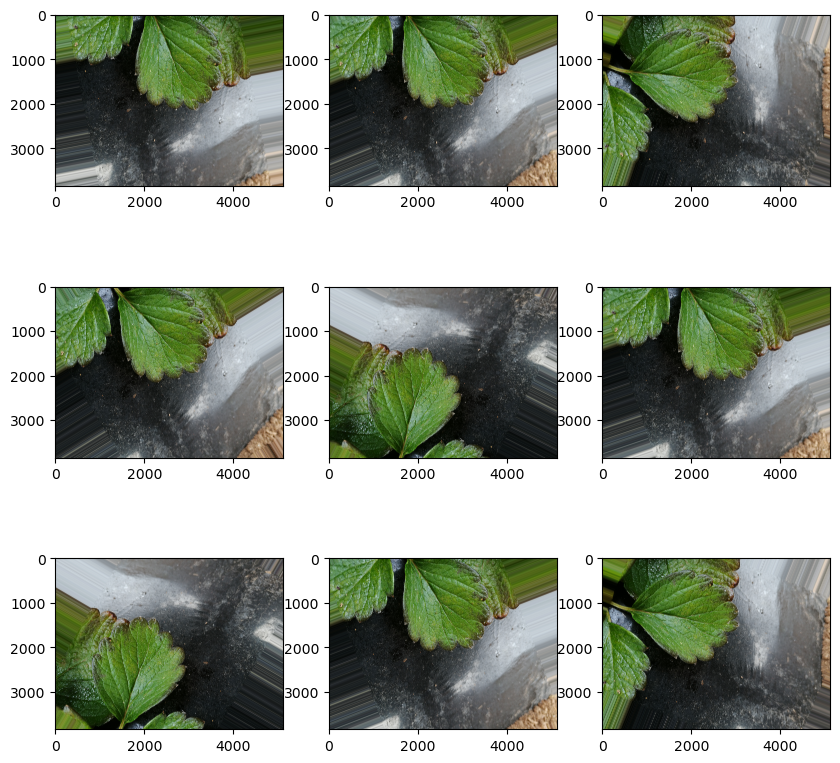

In [25]:
# Data augmentation example
# Common healthy leaf image
img = load_img('split/test/healthy/1088.jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
# Demonstrating random rotation
datagen = ImageDataGenerator(rotation_range=90,fill_mode='nearest')
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
fig=plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

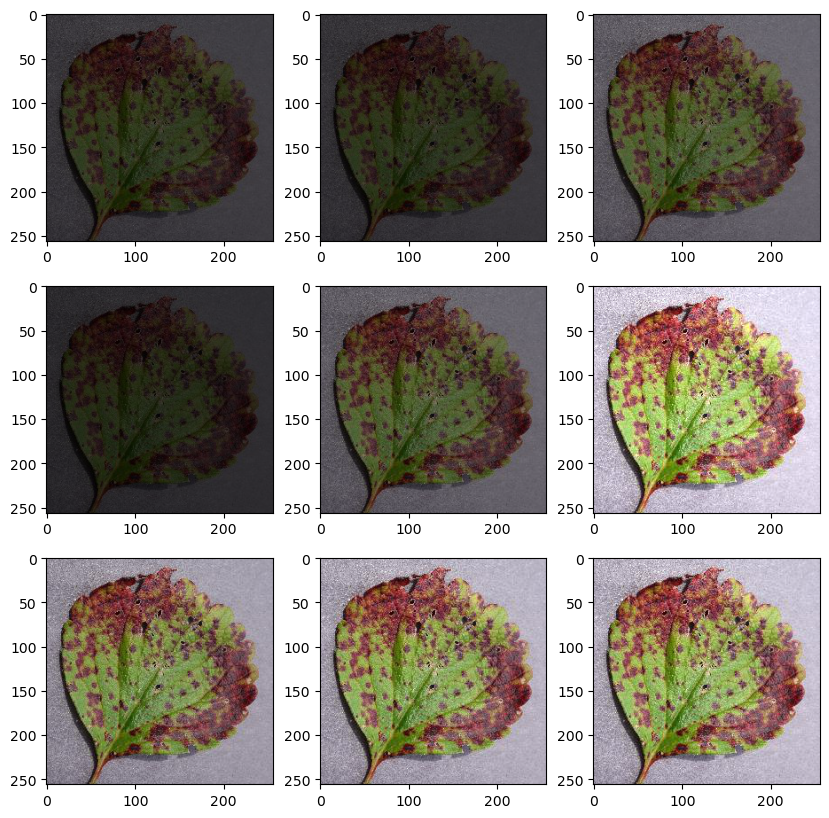

In [26]:
# Leafscorch image
img = load_img('split/test/Leafscorch/StrawberryLeafScorch(1022).JPG')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
# Demonstrating brightness augmentation
datagen = ImageDataGenerator(brightness_range=[0.2,1.5])
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
fig=plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [6]:
# leaf_spot image
img = load_img('split/test/leaf_spot/leaf_spot145.jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
# Demonstrating brightness augmentation
datagen = ImageDataGenerator(zoom_range=0.5)
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
fig=plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

NameError: name 'ncols' is not defined

<Figure size 640x480 with 0 Axes>

In [177]:
batch_size = 16
img_height = 128
img_width = 128
NUM_CLASSES = 3

In [178]:
# Rescaling images by 1./255
# Splitting data into training and validation sets
# Performing data augmentation on training images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range=90,fill_mode='nearest',
#                                    brightness_range=[0.4,1.5],
                                   validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .2)


In [179]:
training_set = train_datagen.flow_from_directory(
        './split/train',
        target_size=(img_height, img_height),
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical',
        subset='training')

validation_set = test_datagen.flow_from_directory(
        './split/train',
        target_size=(img_height, img_height),
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical',
        shuffle = False,
        subset='validation')

Found 2958 images belonging to 3 classes.
Found 739 images belonging to 3 classes.


In [180]:
model_name = "DenseNet121"
optimizer = "Adam"

In [181]:
batch_size = 16
img_height = 128
img_width = 128
NUM_CLASSES = 3

In [182]:

model = keras.Sequential()

OldModel=DenseNet121(
    include_top=False, 
    input_shape=(img_height, img_height, 3),weights='imagenet'
) 

# model.add(layers.Lambda(lambda x:K.backend.resize_images(x,height_factor=4,width_factor=4,data_format='channels_last')))
model.add(OldModel)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))

# model.fit_generator(training_set,
#                     steps_per_epoch=len(training_set),
#                     epochs=100,
#                     validation_data=validation_set,
#                     validation_steps = len(validation_set))

In [183]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_13 (Flatten)        (None, 16384)             0         
                                                                 
 batch_normalization_39 (Bat  (None, 16384)            65536     
 chNormalization)                                                
                                                                 
 dense_54 (Dense)            (None, 256)               4194560   
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_40 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [184]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

print("now =", now)

# dd/mm/YY H:M:S
str_time = now.strftime("%Hl%Ml%S")
print("date and time =", str_time)

now = 2023-03-14 05:05:48.178424
date and time = 05l05l48


In [185]:
anne = ReduceLROnPlateau(monitor='val_accuracy', 
                         factor=0.5, 
                         patience=2, 
                         min_delta=0.001,
                         verbose=1, 
#                          min_lr=MinlearningRateAdj, 
                        
                        )
checkpoint = ModelCheckpoint(r'./ModelSave/modelBest-'+str_time+'.h5', verbose=1, save_best_only=True)

history = model.fit(
    training_set,
    epochs=20,
    verbose=1,
    validation_data=validation_set,
#   callbacks=[checkpoint]
    callbacks=[anne, checkpoint]
)

Epoch 1/20
185/185 [==============================] - ETA: 0s - loss: 0.3781 - accuracy: 0.8391
Epoch 1: val_loss improved from inf to 12.46372, saving model to ./ModelSave\modelBest-05l05l48.h5
185/185 [==============================] - 557s 3s/step - loss: 0.3781 - accuracy: 0.8391 - val_loss: 12.4637 - val_accuracy: 0.7930 - lr: 0.0010
Epoch 2/20
185/185 [==============================] - ETA: 0s - loss: 0.2027 - accuracy: 0.9236
Epoch 2: val_loss improved from 12.46372 to 0.53815, saving model to ./ModelSave\modelBest-05l05l48.h5
185/185 [==============================] - 511s 3s/step - loss: 0.2027 - accuracy: 0.9236 - val_loss: 0.5381 - val_accuracy: 0.8593 - lr: 0.0010
Epoch 3/20
185/185 [==============================] - ETA: 0s - loss: 0.1605 - accuracy: 0.9449
Epoch 3: val_loss did not improve from 0.53815
185/185 [==============================] - 494s 3s/step - loss: 0.1605 - accuracy: 0.9449 - val_loss: 0.7501 - val_accuracy: 0.7226 - lr: 0.0010
Epoch 4/20
185/185 [=======

In [186]:
model.save(r'./ModelSave/modelEnd-'+str_time+'.h5')

In [187]:
nb_epochs =20

Model = DenseNet121
Optimizer = Adam
Image Size = 128
Batch = 16


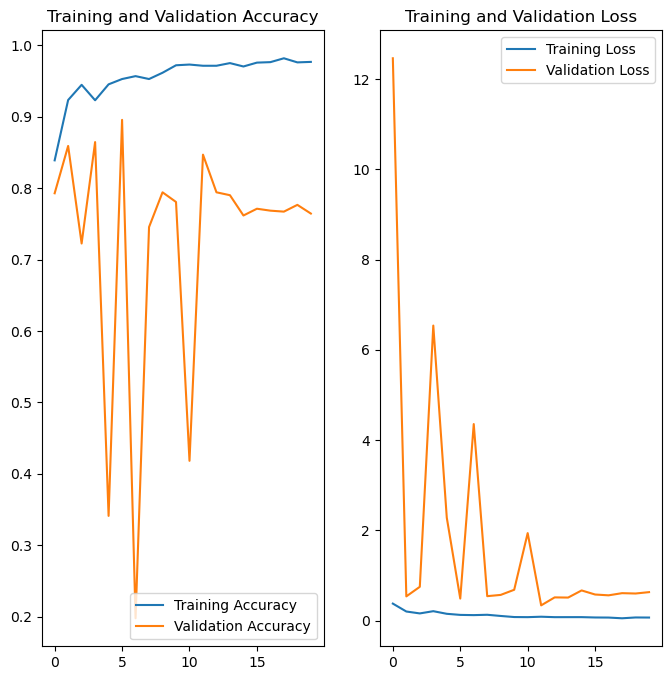

In [188]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(nb_epochs)

print("Model = "+model_name)
print("Optimizer = "+optimizer)
print("Image Size = {}".format(img_width))
print("Batch = {}".format(batch_size))




plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

#####  use this  to save train graph as png #####################
from datetime import datetime
dt = datetime.now()
ts = datetime.timestamp(dt)
date_time = datetime.fromtimestamp(ts)
str_date_time = date_time.strftime("%d-%m-%Y_%H-%M")
graph_path = r'C:\Users\thanaphat turienngam\Desktop\Cassava\classification\experimentData\graph'
if( not (os.path.exists(graph_path)) ) :
    os.mkdir(graph_path)
plt.savefig(graph_path+'/'+str_date_time+".png")  
#####  use this  to save train graph as png #####################

plt.show()


graph_path = graph_path+'/'+str_date_time+".png"


In [189]:
acc = np.array(acc)
val_acc = np.array(val_acc)

In [190]:
val_acc

array([0.79296345, 0.85926926, 0.72259808, 0.86468202, 0.34100136,
       0.89580512, 0.19756427, 0.74560219, 0.79431665, 0.78078485,
       0.4181326 , 0.84709066, 0.79431665, 0.7902571 , 0.76184034,
       0.77131259, 0.76860625, 0.76725304, 0.77672529, 0.76454669])

In [191]:
confm = tf.math.confusion_matrix(
    acc,
    val_acc,
    num_classes=NUM_CLASSES,
    dtype=tf.dtypes.int32,
    name=class_names
)

In [192]:
import seaborn as sns
import pandas as pd

df_cm = pd.DataFrame((confm/confm.astype(np.float32).sum(axis=1)), index =class_names,
              columns =class_names )
plt.figure(figsize = (12,9))
plt.title('All fold confusion matrix of the multi-class classification\n\nModel '+'DenseNet121'+'\n\nMean Accuracy is {:.2f}'.format((np.mean(result[1]))))
sns.heatmap(df_cm, annot=True,cmap="Blues",fmt=".2f")

AttributeError: 
        'EagerTensor' object has no attribute 'astype'.
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()

In [193]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten_13 (Flatten)        (None, 16384)             0         
                                                                 
 batch_normalization_39 (Bat  (None, 16384)            65536     
 chNormalization)                                                
                                                                 
 dense_54 (Dense)            (None, 256)               4194560   
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_40 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [194]:
test_dir =r"C:\Users\thanaphat turienngam\Desktop\MIT\dataset\split\t"
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=1,
    shuffle = True
)


Found 4232 files belonging to 3 classes.


Found 443 images belonging to 3 classes.


In [196]:
test_data = test_ds.map(tf.autograph.experimental.do_not_convert(lambda x, y: (x , 
                                      tf.one_hot(y, depth=3))))
result = model.evaluate(test_data)

4232/4232 [==============================] - 291s 67ms/step - loss: 2631.9224 - accuracy: 0.7082


In [197]:
test_x = []
test_y = []
for images, labels in test_data:
    test_x.append(images)
    test_y.append(np.argmax(labels))

In [198]:
%%time
preds = []
i=0;
for img in test_x:
    preds.append(np.argmax(model.predict(img, verbose=0)))
    i=i+1
    print("Running : "+str(i)+"/"+str(len(test_x))+" = "+str(i/len(test_x)*100)+"%")

Running : 1/4232 = 0.023629489603024575%
Running : 2/4232 = 0.04725897920604915%
Running : 3/4232 = 0.07088846880907373%
Running : 4/4232 = 0.0945179584120983%
Running : 5/4232 = 0.11814744801512288%
Running : 6/4232 = 0.14177693761814747%
Running : 7/4232 = 0.16540642722117202%
Running : 8/4232 = 0.1890359168241966%
Running : 9/4232 = 0.21266540642722118%
Running : 10/4232 = 0.23629489603024575%
Running : 11/4232 = 0.2599243856332703%
Running : 12/4232 = 0.28355387523629494%
Running : 13/4232 = 0.30718336483931946%
Running : 14/4232 = 0.33081285444234404%
Running : 15/4232 = 0.3544423440453686%
Running : 16/4232 = 0.3780718336483932%
Running : 17/4232 = 0.4017013232514178%
Running : 18/4232 = 0.42533081285444235%
Running : 19/4232 = 0.44896030245746693%
Running : 20/4232 = 0.4725897920604915%
Running : 21/4232 = 0.49621928166351603%
Running : 22/4232 = 0.5198487712665406%
Running : 23/4232 = 0.5434782608695652%
Running : 24/4232 = 0.5671077504725899%
Running : 25/4232 = 0.590737240075

Running : 206/4232 = 4.8676748582230625%
Running : 207/4232 = 4.891304347826087%
Running : 208/4232 = 4.914933837429111%
Running : 209/4232 = 4.938563327032136%
Running : 210/4232 = 4.962192816635161%
Running : 211/4232 = 4.985822306238185%
Running : 212/4232 = 5.00945179584121%
Running : 213/4232 = 5.033081285444235%
Running : 214/4232 = 5.056710775047259%
Running : 215/4232 = 5.0803402646502835%
Running : 216/4232 = 5.103969754253308%
Running : 217/4232 = 5.1275992438563325%
Running : 218/4232 = 5.151228733459357%
Running : 219/4232 = 5.174858223062382%
Running : 220/4232 = 5.198487712665406%
Running : 221/4232 = 5.222117202268431%
Running : 222/4232 = 5.245746691871456%
Running : 223/4232 = 5.26937618147448%
Running : 224/4232 = 5.293005671077505%
Running : 225/4232 = 5.316635160680529%
Running : 226/4232 = 5.3402646502835545%
Running : 227/4232 = 5.363894139886578%
Running : 228/4232 = 5.387523629489603%
Running : 229/4232 = 5.411153119092628%
Running : 230/4232 = 5.434782608695652

Running : 413/4232 = 9.75897920604915%
Running : 414/4232 = 9.782608695652174%
Running : 415/4232 = 9.806238185255198%
Running : 416/4232 = 9.829867674858223%
Running : 417/4232 = 9.853497164461247%
Running : 418/4232 = 9.877126654064272%
Running : 419/4232 = 9.900756143667296%
Running : 420/4232 = 9.924385633270322%
Running : 421/4232 = 9.948015122873347%
Running : 422/4232 = 9.97164461247637%
Running : 423/4232 = 9.995274102079394%
Running : 424/4232 = 10.01890359168242%
Running : 425/4232 = 10.042533081285445%
Running : 426/4232 = 10.06616257088847%
Running : 427/4232 = 10.089792060491494%
Running : 428/4232 = 10.113421550094518%
Running : 429/4232 = 10.137051039697543%
Running : 430/4232 = 10.160680529300567%
Running : 431/4232 = 10.184310018903592%
Running : 432/4232 = 10.207939508506616%
Running : 433/4232 = 10.23156899810964%
Running : 434/4232 = 10.255198487712665%
Running : 435/4232 = 10.27882797731569%
Running : 436/4232 = 10.302457466918714%
Running : 437/4232 = 10.326086956

Running : 615/4232 = 14.532136105860113%
Running : 616/4232 = 14.555765595463138%
Running : 617/4232 = 14.579395085066164%
Running : 618/4232 = 14.603024574669188%
Running : 619/4232 = 14.626654064272213%
Running : 620/4232 = 14.650283553875237%
Running : 621/4232 = 14.673913043478262%
Running : 622/4232 = 14.697542533081284%
Running : 623/4232 = 14.721172022684309%
Running : 624/4232 = 14.744801512287333%
Running : 625/4232 = 14.76843100189036%
Running : 626/4232 = 14.792060491493384%
Running : 627/4232 = 14.815689981096408%
Running : 628/4232 = 14.839319470699433%
Running : 629/4232 = 14.862948960302457%
Running : 630/4232 = 14.886578449905482%
Running : 631/4232 = 14.910207939508508%
Running : 632/4232 = 14.933837429111533%
Running : 633/4232 = 14.957466918714557%
Running : 634/4232 = 14.98109640831758%
Running : 635/4232 = 15.004725897920604%
Running : 636/4232 = 15.028355387523629%
Running : 637/4232 = 15.051984877126653%
Running : 638/4232 = 15.075614366729678%
Running : 639/4232

Running : 817/4232 = 19.30529300567108%
Running : 818/4232 = 19.328922495274103%
Running : 819/4232 = 19.352551984877124%
Running : 820/4232 = 19.376181474480152%
Running : 821/4232 = 19.399810964083176%
Running : 822/4232 = 19.4234404536862%
Running : 823/4232 = 19.447069943289225%
Running : 824/4232 = 19.47069943289225%
Running : 825/4232 = 19.494328922495274%
Running : 826/4232 = 19.5179584120983%
Running : 827/4232 = 19.541587901701323%
Running : 828/4232 = 19.565217391304348%
Running : 829/4232 = 19.588846880907372%
Running : 830/4232 = 19.612476370510397%
Running : 831/4232 = 19.63610586011342%
Running : 832/4232 = 19.659735349716446%
Running : 833/4232 = 19.68336483931947%
Running : 834/4232 = 19.706994328922494%
Running : 835/4232 = 19.73062381852552%
Running : 836/4232 = 19.754253308128543%
Running : 837/4232 = 19.777882797731568%
Running : 838/4232 = 19.801512287334592%
Running : 839/4232 = 19.82514177693762%
Running : 840/4232 = 19.848771266540645%
Running : 841/4232 = 19.87

Running : 1020/4232 = 24.102079395085067%
Running : 1021/4232 = 24.12570888468809%
Running : 1022/4232 = 24.149338374291116%
Running : 1023/4232 = 24.17296786389414%
Running : 1024/4232 = 24.196597353497165%
Running : 1025/4232 = 24.22022684310019%
Running : 1026/4232 = 24.243856332703213%
Running : 1027/4232 = 24.267485822306238%
Running : 1028/4232 = 24.291115311909262%
Running : 1029/4232 = 24.314744801512287%
Running : 1030/4232 = 24.33837429111531%
Running : 1031/4232 = 24.362003780718336%
Running : 1032/4232 = 24.38563327032136%
Running : 1033/4232 = 24.409262759924385%
Running : 1034/4232 = 24.43289224952741%
Running : 1035/4232 = 24.456521739130434%
Running : 1036/4232 = 24.48015122873346%
Running : 1037/4232 = 24.503780718336486%
Running : 1038/4232 = 24.52741020793951%
Running : 1039/4232 = 24.551039697542535%
Running : 1040/4232 = 24.574669187145556%
Running : 1041/4232 = 24.59829867674858%
Running : 1042/4232 = 24.621928166351605%
Running : 1043/4232 = 24.64555765595463%
Ru

Running : 1219/4232 = 28.804347826086957%
Running : 1220/4232 = 28.827977315689978%
Running : 1221/4232 = 28.851606805293006%
Running : 1222/4232 = 28.875236294896027%
Running : 1223/4232 = 28.898865784499055%
Running : 1224/4232 = 28.92249527410208%
Running : 1225/4232 = 28.946124763705107%
Running : 1226/4232 = 28.96975425330813%
Running : 1227/4232 = 28.993383742911156%
Running : 1228/4232 = 29.017013232514177%
Running : 1229/4232 = 29.040642722117205%
Running : 1230/4232 = 29.064272211720226%
Running : 1231/4232 = 29.087901701323247%
Running : 1232/4232 = 29.111531190926275%
Running : 1233/4232 = 29.1351606805293%
Running : 1234/4232 = 29.158790170132328%
Running : 1235/4232 = 29.18241965973535%
Running : 1236/4232 = 29.206049149338376%
Running : 1237/4232 = 29.229678638941397%
Running : 1238/4232 = 29.253308128544425%
Running : 1239/4232 = 29.276937618147446%
Running : 1240/4232 = 29.300567107750474%
Running : 1241/4232 = 29.324196597353495%
Running : 1242/4232 = 29.34782608695652

Running : 1417/4232 = 33.482986767485826%
Running : 1418/4232 = 33.506616257088844%
Running : 1419/4232 = 33.530245746691875%
Running : 1420/4232 = 33.55387523629489%
Running : 1421/4232 = 33.577504725897924%
Running : 1422/4232 = 33.60113421550094%
Running : 1423/4232 = 33.62476370510397%
Running : 1424/4232 = 33.64839319470699%
Running : 1425/4232 = 33.67202268431002%
Running : 1426/4232 = 33.69565217391305%
Running : 1427/4232 = 33.71928166351607%
Running : 1428/4232 = 33.742911153119096%
Running : 1429/4232 = 33.76654064272211%
Running : 1430/4232 = 33.790170132325144%
Running : 1431/4232 = 33.81379962192816%
Running : 1432/4232 = 33.83742911153119%
Running : 1433/4232 = 33.86105860113421%
Running : 1434/4232 = 33.88468809073724%
Running : 1435/4232 = 33.90831758034027%
Running : 1436/4232 = 33.93194706994329%
Running : 1437/4232 = 33.955576559546316%
Running : 1438/4232 = 33.97920604914934%
Running : 1439/4232 = 34.002835538752365%
Running : 1440/4232 = 34.02646502835538%
Running 

Running : 1618/4232 = 38.23251417769376%
Running : 1619/4232 = 38.25614366729679%
Running : 1620/4232 = 38.27977315689981%
Running : 1621/4232 = 38.30340264650284%
Running : 1622/4232 = 38.327032136105856%
Running : 1623/4232 = 38.35066162570889%
Running : 1624/4232 = 38.37429111531191%
Running : 1625/4232 = 38.39792060491493%
Running : 1626/4232 = 38.42155009451796%
Running : 1627/4232 = 38.44517958412098%
Running : 1628/4232 = 38.46880907372401%
Running : 1629/4232 = 38.49243856332703%
Running : 1630/4232 = 38.51606805293006%
Running : 1631/4232 = 38.53969754253308%
Running : 1632/4232 = 38.56332703213611%
Running : 1633/4232 = 38.58695652173913%
Running : 1634/4232 = 38.61058601134216%
Running : 1635/4232 = 38.63421550094518%
Running : 1636/4232 = 38.657844990548206%
Running : 1637/4232 = 38.68147448015123%
Running : 1638/4232 = 38.70510396975425%
Running : 1639/4232 = 38.72873345935728%
Running : 1640/4232 = 38.752362948960304%
Running : 1641/4232 = 38.77599243856333%
Running : 164

Running : 1818/4232 = 42.95841209829867%
Running : 1819/4232 = 42.982041587901705%
Running : 1820/4232 = 43.00567107750473%
Running : 1821/4232 = 43.02930056710775%
Running : 1822/4232 = 43.05293005671078%
Running : 1823/4232 = 43.076559546313796%
Running : 1824/4232 = 43.10018903591683%
Running : 1825/4232 = 43.123818525519845%
Running : 1826/4232 = 43.147448015122876%
Running : 1827/4232 = 43.17107750472589%
Running : 1828/4232 = 43.194706994328925%
Running : 1829/4232 = 43.21833648393195%
Running : 1830/4232 = 43.241965973534974%
Running : 1831/4232 = 43.265595463138%
Running : 1832/4232 = 43.28922495274102%
Running : 1833/4232 = 43.31285444234405%
Running : 1834/4232 = 43.336483931947065%
Running : 1835/4232 = 43.360113421550096%
Running : 1836/4232 = 43.383742911153114%
Running : 1837/4232 = 43.407372400756145%
Running : 1838/4232 = 43.43100189035917%
Running : 1839/4232 = 43.454631379962194%
Running : 1840/4232 = 43.47826086956522%
Running : 1841/4232 = 43.50189035916824%
Running

Running : 2018/4232 = 47.684310018903595%
Running : 2019/4232 = 47.70793950850661%
Running : 2020/4232 = 47.731568998109644%
Running : 2021/4232 = 47.75519848771266%
Running : 2022/4232 = 47.77882797731569%
Running : 2023/4232 = 47.80245746691871%
Running : 2024/4232 = 47.82608695652174%
Running : 2025/4232 = 47.84971644612476%
Running : 2026/4232 = 47.87334593572779%
Running : 2027/4232 = 47.896975425330815%
Running : 2028/4232 = 47.92060491493384%
Running : 2029/4232 = 47.944234404536864%
Running : 2030/4232 = 47.96786389413988%
Running : 2031/4232 = 47.99149338374291%
Running : 2032/4232 = 48.01512287334593%
Running : 2033/4232 = 48.03875236294896%
Running : 2034/4232 = 48.06238185255198%
Running : 2035/4232 = 48.08601134215501%
Running : 2036/4232 = 48.109640831758036%
Running : 2037/4232 = 48.13327032136106%
Running : 2038/4232 = 48.156899810964084%
Running : 2039/4232 = 48.18052930056711%
Running : 2040/4232 = 48.20415879017013%
Running : 2041/4232 = 48.22778827977316%
Running : 

Running : 2218/4232 = 52.4102079395085%
Running : 2219/4232 = 52.43383742911153%
Running : 2220/4232 = 52.45746691871456%
Running : 2221/4232 = 52.48109640831758%
Running : 2222/4232 = 52.5047258979206%
Running : 2223/4232 = 52.52835538752363%
Running : 2224/4232 = 52.55198487712666%
Running : 2225/4232 = 52.57561436672968%
Running : 2226/4232 = 52.5992438563327%
Running : 2227/4232 = 52.62287334593573%
Running : 2228/4232 = 52.646502835538755%
Running : 2229/4232 = 52.67013232514177%
Running : 2230/4232 = 52.693761814744796%
Running : 2231/4232 = 52.71739130434783%
Running : 2232/4232 = 52.74102079395085%
Running : 2233/4232 = 52.76465028355387%
Running : 2234/4232 = 52.7882797731569%
Running : 2235/4232 = 52.811909262759926%
Running : 2236/4232 = 52.83553875236295%
Running : 2237/4232 = 52.85916824196597%
Running : 2238/4232 = 52.882797731569%
Running : 2239/4232 = 52.906427221172024%
Running : 2240/4232 = 52.93005671077504%
Running : 2241/4232 = 52.95368620037807%
Running : 2242/423

Running : 2418/4232 = 57.13610586011342%
Running : 2419/4232 = 57.15973534971644%
Running : 2420/4232 = 57.183364839319474%
Running : 2421/4232 = 57.2069943289225%
Running : 2422/4232 = 57.230623818525515%
Running : 2423/4232 = 57.25425330812855%
Running : 2424/4232 = 57.27788279773157%
Running : 2425/4232 = 57.30151228733459%
Running : 2426/4232 = 57.32514177693761%
Running : 2427/4232 = 57.348771266540645%
Running : 2428/4232 = 57.37240075614367%
Running : 2429/4232 = 57.39603024574669%
Running : 2430/4232 = 57.41965973534972%
Running : 2431/4232 = 57.44328922495274%
Running : 2432/4232 = 57.46691871455577%
Running : 2433/4232 = 57.490548204158785%
Running : 2434/4232 = 57.514177693761816%
Running : 2435/4232 = 57.53780718336484%
Running : 2436/4232 = 57.56143667296786%
Running : 2437/4232 = 57.58506616257088%
Running : 2438/4232 = 57.608695652173914%
Running : 2439/4232 = 57.63232514177694%
Running : 2440/4232 = 57.655954631379956%
Running : 2441/4232 = 57.67958412098299%
Running : 

Running : 2617/4232 = 61.838374291115315%
Running : 2618/4232 = 61.86200378071833%
Running : 2619/4232 = 61.885633270321364%
Running : 2620/4232 = 61.90926275992439%
Running : 2621/4232 = 61.932892249527406%
Running : 2622/4232 = 61.95652173913043%
Running : 2623/4232 = 61.98015122873346%
Running : 2624/4232 = 62.003780718336486%
Running : 2625/4232 = 62.0274102079395%
Running : 2626/4232 = 62.051039697542535%
Running : 2627/4232 = 62.07466918714556%
Running : 2628/4232 = 62.098298676748584%
Running : 2629/4232 = 62.1219281663516%
Running : 2630/4232 = 62.14555765595463%
Running : 2631/4232 = 62.16918714555766%
Running : 2632/4232 = 62.19281663516069%
Running : 2633/4232 = 62.2164461247637%
Running : 2634/4232 = 62.24007561436673%
Running : 2635/4232 = 62.263705103969755%
Running : 2636/4232 = 62.28733459357277%
Running : 2637/4232 = 62.310964083175804%
Running : 2638/4232 = 62.33459357277883%
Running : 2639/4232 = 62.35822306238185%
Running : 2640/4232 = 62.38185255198487%
Running : 2

Running : 2819/4232 = 66.61153119092627%
Running : 2820/4232 = 66.63516068052931%
Running : 2821/4232 = 66.65879017013232%
Running : 2822/4232 = 66.68241965973534%
Running : 2823/4232 = 66.70604914933837%
Running : 2824/4232 = 66.72967863894141%
Running : 2825/4232 = 66.75330812854442%
Running : 2826/4232 = 66.77693761814744%
Running : 2827/4232 = 66.80056710775048%
Running : 2828/4232 = 66.8241965973535%
Running : 2829/4232 = 66.84782608695652%
Running : 2830/4232 = 66.87145557655954%
Running : 2831/4232 = 66.89508506616258%
Running : 2832/4232 = 66.91871455576559%
Running : 2833/4232 = 66.94234404536861%
Running : 2834/4232 = 66.96597353497165%
Running : 2835/4232 = 66.98960302457468%
Running : 2836/4232 = 67.01323251417769%
Running : 2837/4232 = 67.03686200378071%
Running : 2838/4232 = 67.06049149338375%
Running : 2839/4232 = 67.08412098298678%
Running : 2840/4232 = 67.10775047258979%
Running : 2841/4232 = 67.13137996219281%
Running : 2842/4232 = 67.15500945179585%
Running : 2843/42

Running : 3021/4232 = 71.38468809073724%
Running : 3022/4232 = 71.40831758034027%
Running : 3023/4232 = 71.43194706994329%
Running : 3024/4232 = 71.45557655954632%
Running : 3025/4232 = 71.47920604914934%
Running : 3026/4232 = 71.50283553875236%
Running : 3027/4232 = 71.52646502835539%
Running : 3028/4232 = 71.55009451795841%
Running : 3029/4232 = 71.57372400756144%
Running : 3030/4232 = 71.59735349716446%
Running : 3031/4232 = 71.62098298676749%
Running : 3032/4232 = 71.64461247637051%
Running : 3033/4232 = 71.66824196597354%
Running : 3034/4232 = 71.69187145557656%
Running : 3035/4232 = 71.71550094517958%
Running : 3036/4232 = 71.73913043478261%
Running : 3037/4232 = 71.76275992438563%
Running : 3038/4232 = 71.78638941398866%
Running : 3039/4232 = 71.81001890359168%
Running : 3040/4232 = 71.83364839319471%
Running : 3041/4232 = 71.85727788279773%
Running : 3042/4232 = 71.88090737240076%
Running : 3043/4232 = 71.90453686200378%
Running : 3044/4232 = 71.9281663516068%
Running : 3045/42

Running : 3222/4232 = 76.13421550094517%
Running : 3223/4232 = 76.15784499054821%
Running : 3224/4232 = 76.18147448015122%
Running : 3225/4232 = 76.20510396975425%
Running : 3226/4232 = 76.22873345935727%
Running : 3227/4232 = 76.25236294896031%
Running : 3228/4232 = 76.27599243856332%
Running : 3229/4232 = 76.29962192816635%
Running : 3230/4232 = 76.32325141776938%
Running : 3231/4232 = 76.34688090737241%
Running : 3232/4232 = 76.37051039697542%
Running : 3233/4232 = 76.39413988657844%
Running : 3234/4232 = 76.41776937618148%
Running : 3235/4232 = 76.4413988657845%
Running : 3236/4232 = 76.46502835538752%
Running : 3237/4232 = 76.48865784499054%
Running : 3238/4232 = 76.51228733459358%
Running : 3239/4232 = 76.53591682419659%
Running : 3240/4232 = 76.55954631379961%
Running : 3241/4232 = 76.58317580340265%
Running : 3242/4232 = 76.60680529300568%
Running : 3243/4232 = 76.63043478260869%
Running : 3244/4232 = 76.65406427221171%
Running : 3245/4232 = 76.67769376181475%
Running : 3246/42

Running : 3423/4232 = 80.88374291115312%
Running : 3424/4232 = 80.90737240075615%
Running : 3425/4232 = 80.93100189035917%
Running : 3426/4232 = 80.9546313799622%
Running : 3427/4232 = 80.97826086956522%
Running : 3428/4232 = 81.00189035916824%
Running : 3429/4232 = 81.02551984877127%
Running : 3430/4232 = 81.04914933837429%
Running : 3431/4232 = 81.07277882797732%
Running : 3432/4232 = 81.09640831758034%
Running : 3433/4232 = 81.12003780718337%
Running : 3434/4232 = 81.14366729678639%
Running : 3435/4232 = 81.16729678638941%
Running : 3436/4232 = 81.19092627599244%
Running : 3437/4232 = 81.21455576559546%
Running : 3438/4232 = 81.23818525519849%
Running : 3439/4232 = 81.26181474480151%
Running : 3440/4232 = 81.28544423440454%
Running : 3441/4232 = 81.30907372400756%
Running : 3442/4232 = 81.33270321361059%
Running : 3443/4232 = 81.35633270321361%
Running : 3444/4232 = 81.37996219281663%
Running : 3445/4232 = 81.40359168241966%
Running : 3446/4232 = 81.42722117202268%
Running : 3447/42

Running : 3625/4232 = 85.65689981096408%
Running : 3626/4232 = 85.68052930056712%
Running : 3627/4232 = 85.70415879017014%
Running : 3628/4232 = 85.72778827977315%
Running : 3629/4232 = 85.75141776937618%
Running : 3630/4232 = 85.77504725897921%
Running : 3631/4232 = 85.79867674858222%
Running : 3632/4232 = 85.82230623818525%
Running : 3633/4232 = 85.84593572778829%
Running : 3634/4232 = 85.86956521739131%
Running : 3635/4232 = 85.89319470699432%
Running : 3636/4232 = 85.91682419659735%
Running : 3637/4232 = 85.94045368620039%
Running : 3638/4232 = 85.96408317580341%
Running : 3639/4232 = 85.98771266540642%
Running : 3640/4232 = 86.01134215500946%
Running : 3641/4232 = 86.03497164461248%
Running : 3642/4232 = 86.0586011342155%
Running : 3643/4232 = 86.08223062381852%
Running : 3644/4232 = 86.10586011342156%
Running : 3645/4232 = 86.12948960302458%
Running : 3646/4232 = 86.15311909262759%
Running : 3647/4232 = 86.17674858223062%
Running : 3648/4232 = 86.20037807183365%
Running : 3649/42

Running : 3826/4232 = 90.40642722117202%
Running : 3827/4232 = 90.43005671077505%
Running : 3828/4232 = 90.45368620037807%
Running : 3829/4232 = 90.4773156899811%
Running : 3830/4232 = 90.50094517958412%
Running : 3831/4232 = 90.52457466918715%
Running : 3832/4232 = 90.54820415879017%
Running : 3833/4232 = 90.5718336483932%
Running : 3834/4232 = 90.59546313799622%
Running : 3835/4232 = 90.61909262759924%
Running : 3836/4232 = 90.64272211720227%
Running : 3837/4232 = 90.66635160680529%
Running : 3838/4232 = 90.68998109640832%
Running : 3839/4232 = 90.71361058601134%
Running : 3840/4232 = 90.73724007561437%
Running : 3841/4232 = 90.76086956521739%
Running : 3842/4232 = 90.78449905482042%
Running : 3843/4232 = 90.80812854442344%
Running : 3844/4232 = 90.83175803402646%
Running : 3845/4232 = 90.85538752362949%
Running : 3846/4232 = 90.87901701323251%
Running : 3847/4232 = 90.90264650283554%
Running : 3848/4232 = 90.92627599243856%
Running : 3849/4232 = 90.94990548204159%
Running : 3850/423

Running : 4027/4232 = 95.15595463137996%
Running : 4028/4232 = 95.17958412098298%
Running : 4029/4232 = 95.20321361058602%
Running : 4030/4232 = 95.22684310018904%
Running : 4031/4232 = 95.25047258979205%
Running : 4032/4232 = 95.27410207939508%
Running : 4033/4232 = 95.29773156899812%
Running : 4034/4232 = 95.32136105860114%
Running : 4035/4232 = 95.34499054820415%
Running : 4036/4232 = 95.36862003780719%
Running : 4037/4232 = 95.39224952741021%
Running : 4038/4232 = 95.41587901701322%
Running : 4039/4232 = 95.43950850661625%
Running : 4040/4232 = 95.46313799621929%
Running : 4041/4232 = 95.48676748582231%
Running : 4042/4232 = 95.51039697542532%
Running : 4043/4232 = 95.53402646502835%
Running : 4044/4232 = 95.55765595463139%
Running : 4045/4232 = 95.58128544423441%
Running : 4046/4232 = 95.60491493383742%
Running : 4047/4232 = 95.62854442344046%
Running : 4048/4232 = 95.65217391304348%
Running : 4049/4232 = 95.6758034026465%
Running : 4050/4232 = 95.69943289224952%
Running : 4051/42

Running : 4228/4232 = 99.9054820415879%
Running : 4229/4232 = 99.92911153119093%
Running : 4230/4232 = 99.95274102079395%
Running : 4231/4232 = 99.97637051039698%
Running : 4232/4232 = 100.0%
CPU times: total: 11min 30s
Wall time: 10min 50s


In [199]:
preds = np.array(preds)
test_y = np.array(test_y)

In [200]:
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [206]:
display(test_y)

array([1, 1, 1, ..., 1, 2, 0], dtype=int64)

In [202]:
confm = tf.math.confusion_matrix(
    test_y,
    preds,
    num_classes=3,
    dtype=tf.dtypes.int32,
    name=classes
)

In [203]:
confm = np.array(confm)

<AxesSubplot:title={'center':'All fold confusion matrix of the multi-class classification\n\nModel DenseNet121\n\nMean Accuracy is 0.71'}>

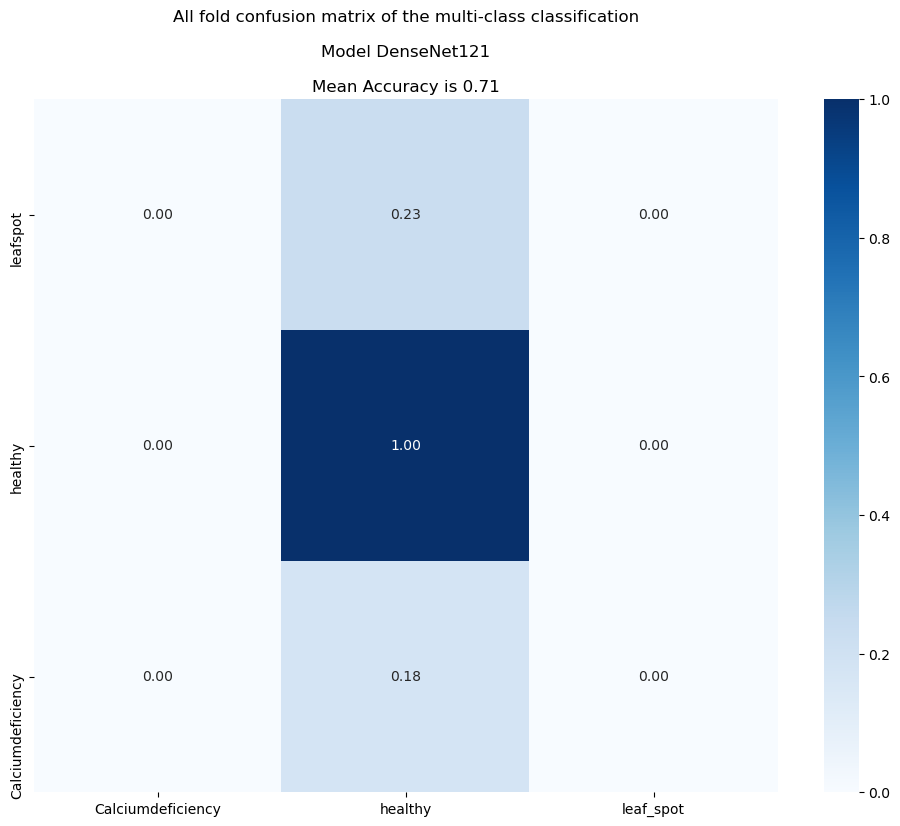

In [204]:
import seaborn as sns
import pandas as pd

df_cm = pd.DataFrame((confm/confm.astype(np.float32).sum(axis=1)), index =classes,
              columns =class_names )
plt.figure(figsize = (12,9))
plt.title('All fold confusion matrix of the multi-class classification\n\nModel '+model_name+'\n\nMean Accuracy is {:.2f}'.format((np.mean(result[1]))))
sns.heatmap(df_cm, annot=True,cmap="Blues",fmt=".2f")